In [1]:
import itertools as it
import more_itertools as more_it
import seaborn as sns
import matplotlib.pyplot as plt
import pprint
import math
%matplotlib inline
%load_ext memory_profiler

# <a id='toc1_'></a>[Disclaimer:](#toc0_)

This notebook was prepared as part of a Python study group organized by the good folks at [Boston Python](https://about.bostonpython.com/). 

Wherever I used external sources, I made an honest effort to refer to them, but if I have made any errors or omitted any original sources, please let me know.

I hope you find this material (and honestly the fun math to go with it,) curious, in your ventures.

Cheers!

-Sid

**Table of contents**<a id='toc0_'></a>    
- [Disclaimer:](#toc1_)    
- [What is an `iterable` in python?](#toc2_)    
- [What is an `iterator` in python?](#toc3_)    
- [`itertools` Module](#toc4_)    
- [Function breakdown of `itertools`](#toc5_)    
  - [Infinite iterators](#toc5_1_)    
  - [Iterators terminating on the shortest input sequence](#toc5_2_)    
  - [Combinatoric iterators](#toc5_3_)    
  - [`itertools` recipes](#toc5_4_)    
  - [`more_itertools`!](#toc5_5_)    
- [`itertools` use scenario #1: Starmap](#toc6_)    
  - [`itertools.starmap()`](#toc6_1_)    
- [`itertools` use scenario #2: Zip functions](#toc7_)    
  - [`itertools.zip_longest()`](#toc7_1_)    
  - [`more_itertools.zip_offset()`](#toc7_2_)    
- [`itertools` use scenario #3: Recursive functions](#toc8_)    
  - [First order recurrence relations](#toc8_1_)    
  - [Second order recurrence relations](#toc8_2_)    
- [`itertools` use scenario #4: Combining Data](#toc9_)    
  - [`more_itertools.collapse()`](#toc9_1_)    
- [`itertools` use scenario #5: Grouping Data](#toc10_)    
  - [`itertools.groupby()`](#toc10_1_)    
  - [`more_itertools.grouper()`](#toc10_2_)    
- [`itertools` use scenario #6: Combinatorics](#toc11_)    
  - [`itertools.permutations()`](#toc11_1_)    
  - [`itertools.combinations()`](#toc11_2_)    
  - [`itertools.product()`](#toc11_3_)    
- [`itertools` use scenario #7: Indexing](#toc12_)    
  - [`more_itertools.locate()`](#toc12_1_)    
  - [`itertools.islice()`](#toc12_2_)    
- [`itertools` use scenario #8: Filtering Data](#toc13_)    
  - [`itertools.compress()`](#toc13_1_)    
  - [`more_itertools.filter_except()`](#toc13_2_)    
- [`itertools` scenario #9: Summarizing data](#toc14_)    
  - [`more_itertools.map_reduce()`](#toc14_1_)    
    - [The strangeness of `pi`](#toc14_1_1_)    
- [`itertools` scenario #10: Splitting Data](#toc15_)    
  - [`itertools.takewhile()`](#toc15_1_)    
    - [Getting the `index` of the entry](#toc15_1_1_)    
  - [`more_itertools.map_except()`](#toc15_2_)    
  - [`moreitertools.partition()`](#toc15_3_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=1
	maxLevel=6
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

# <a id='toc2_'></a>[What is an `iterable` in python?](#toc0_)

Any Python object with a `.__iter__()` or `.__getitem__()` methods is iterable.

```
    Iterable
    
    An object capable of returning its members one at a time. Examples of iterables include all sequence types (such as list, str, and tuple) and some non-sequence types like dict, file objects, and objects of any classes you define with an __iter__() method or with a __getitem__() method that implements sequence semantics.

    Iterables can be used in a for loop and in many other places where a sequence is needed (zip(), map(), …). When an iterable object is passed as an argument to the built-in function iter(), it returns an iterator for the object. This iterator is good for one pass over the set of values. When using iterables, it is usually not necessary to call iter() or deal with iterator objects yourself. The for statement does that automatically for you, creating a temporary unnamed variable to hold the iterator for the duration of the loop. See also iterator, sequence, and generator.

```

# <a id='toc3_'></a>[What is an `iterator` in python?](#toc0_)


```
    Iterator

    An object representing a stream of data. Repeated calls to the iterator’s __next__() method (or passing it to the built-in function next()) return successive items in the stream. When no more data are available a StopIteration exception is raised instead. At this point, the iterator object is exhausted and any further calls to its __next__() method just raise StopIteration again. Iterators are required to have an __iter__() method that returns the iterator object itself so every iterator is also iterable and may be used in most places where other iterables are accepted. One notable exception is code which attempts multiple iteration passes. A container object (such as a list) produces a fresh new iterator each time you pass it to the iter() function or use it in a for loop. Attempting this with an iterator will just return the same exhausted iterator object used in the previous iteration pass, making it appear like an empty container.

```


**E.g. #1:**: `map()` is a built-in operator function that applies `len` to each element in the iterable.

```python

    >>> list(map(len, ['cat','dogs','wombats']))
    [3, 4, 7]

```
**E.g. #2:**: Iterators are iterable, and can be used to compose _iterator algebra_

```python
    >>> list(map(math.prod, zip([2.0,3.1,4], [4, 5, 6])))
    [8.0, 15.5, 24]

```
**E.g. #3:**: `map()` can be used with custom functions as well.

```python

    number_list = [x for x in range(0,10)]

    def function(number):
        print(f"Currently performing transformation on number {number}")
        return number**2

    print('Original list: ', number_list)

    mapped_list = list(map(function, number_list))

    print(f'Post-Transformed list: {mapped_list}')

    Original list:  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
    Currently performing transformation on number 0
    Currently performing transformation on number 1
    Currently performing transformation on number 2
    Currently performing transformation on number 3
    Currently performing transformation on number 4
    Currently performing transformation on number 5
    Currently performing transformation on number 6
    Currently performing transformation on number 7
    Currently performing transformation on number 8
    Currently performing transformation on number 9
    Post-Transformed list: [0, 1, 4, 9, 16, 25, 36, 49, 64, 81]

```

# <a id='toc4_'></a>[`itertools` Module](#toc0_)

- Python's approach to `iterator algebra` 
- fast, memory-efficient, concise code 
    - _lazy evaluation_ (call-by-need) delays evaluatio of expression until its value is needed.

```python

    def itertools_repeat():
        for _ in it.repeat(None, 1_000_000):
            pass

    >>>> %timeit itertools_repeat()
        9.4 ms ± 602 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)

    def standard_loop():
        for _ in range(1_000_000):
            pass

    >>>> %timeit standard_loop()
        20 ms ± 976 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)
```

<!-- # Remarks

Refer to the Real Python example on memory efficiency -->

# <a id='toc5_'></a>[Function breakdown of `itertools`](#toc0_)


## <a id='toc5_1_'></a>[Infinite iterators](#toc0_)

| Iterator | Arguments     | Results                                        | Example                               |
|----------|---------------|------------------------------------------------|---------------------------------------|
| count()  | start, [step] | start, start+step, start+2*step, …             | `count(10) --> 10 11 12 13 14 ...`      |
| cycle()  | p             | p0, p1, … plast, p0, p1, …                     |  `cycle('ABCD') --> A B C D A B C D ...`  |
| **repeat()** | elem [,n]     | elem, elem, elem, … endlessly or up to n times |  `repeat(10, 3) --> 10 10 10`             |

## <a id='toc5_2_'></a>[Iterators terminating on the shortest input sequence](#toc0_)

| Iterator              | Arguments                   | Results                                    | Example                                                  |
|-----------------------|-----------------------------|--------------------------------------------|----------------------------------------------------------|
| **accumulate()**          | p [,func]                   | p0, p0+p1, p0+p1+p2, …                     | `accumulate([1,2,3,4,5]) --> 1 3 6 10 15 `                 |
| chain()               | p, q, …                     | p0, p1, … plast, q0, q1, …                 | `chain('ABC', 'DEF') --> A B C D E F`                      |
| chain.from_iterable() | iterable                    | p0, p1, … plast, q0, q1, …                 | `chain.from_iterable(['ABC', 'DEF']) --> A B C D E F`      |
| compress()            | data, selectors             | (d[0] if s[0]), (d[1] if s[1]), …          | `compress('ABCDEF', [1,0,1,0,1,1]) --> A C E F`            |
| dropwhile()           | pred, seq                   | seq[n], seq[n+1], starting when pred fails | `dropwhile(lambda x: x<5, [1,4,6,4,1]) --> 6 4 1`          |
| **filterfalse()**         | pred, seq                   | elements of seq where pred(elem) is false  | `filterfalse(lambda x: x%2, range(10)) --> 0 2 4 6 8`      |
| **groupby()**             | iterable[, key]             | sub-iterators grouped by value of key(v)   |                                                          |
| **islice()**              | seq, [start,] stop [, step] | elements from seq[start:stop:step]         | `islice('ABCDEFG', 2, None) --> C D E F G`                 |
| pairwise()            | iterable                    | (p[0], p[1]), (p[1], p[2])                 | `pairwise('ABCDEFG') --> AB BC CD DE EF FG`                |
| starmap()             | func, seq                   | func(*seq[0]), func(*seq[1]), …            | `starmap(pow, [(2,5), (3,2), (10,3)]) --> 32 9 1000`       |
| **takewhile()**           | pred, seq                   | seq[0], seq[1], until pred fails           | `takewhile(lambda x: x<5, [1,4,6,4,1]) --> 1 4 `           |
| tee()                 | it, n                       | it1, it2, … itn splits one iterator into n |                                                          |
| zip_longest()         | p, q, …                     | (p[0], q[0]), (p[1], q[1]), …              | `zip_longest('ABCD', 'xy', fillvalue='-') --> Ax By C- D-` |


## <a id='toc5_3_'></a>[Combinatoric iterators](#toc0_)

| Iterator                        | Arguments          | Results                                                       |
|---------------------------------|--------------------|---------------------------------------------------------------|
| product()                       | p, q, … [repeat=1] | cartesian product, equivalent to a nested for-loop            |
| permutations()                  | p[, r]             | r-length tuples, all possible orderings, no repeated elements |
| combinations()                  | p, r               | r-length tuples, in sorted order, no repeated elements        |
| combinations_with_replacement() | p, r               | r-length tuples, in sorted order, with repeated elements      |

Some examples:

| Examples                                 | Results                                         | Results                                                       |
|------------------------------------------|-------------------------------------------------|---------------------------------------------------------------|
| `product('ABCD', repeat=2)`               | `AA AB AC AD BA BB BC BD CA CB CC CD DA DB DC DD` | cartesian product, equivalent to a nested for-loop            |
| `permutations('ABCD', 2)`                  | `AB AC AD BA BC BD CA CB CD DA DB DC`             | r-length tuples, all possible orderings, no repeated elements |
| `combinations('ABCD', 2)`                  | `AB AC AD BC BD CD`                               | r-length tuples, in sorted order, no repeated elements        |
| `combinations_with_replacement('ABCD', 2)` | `AA AB AC AD BB BC BD CC CD DD`                   | r-length tuples, in sorted order, with repeated elements      |

## <a id='toc5_4_'></a>[`itertools` recipes](#toc0_)

Itertools Reciples [URL](https://docs.python.org/3.6/library/itertools.html#itertools-recipes)

## <a id='toc5_5_'></a>[`more_itertools`!](#toc0_)

Honestly, too much to cover even in a table because it's **that** good! [URL](https://more-itertools.readthedocs.io/en/stable/index.html)

# <a id='toc6_'></a>[`itertools` use scenario #1: Starmap](#toc0_)

## <a id='toc6_1_'></a>[`itertools.starmap()`](#toc0_)


Make an iterator that computes the function using arguments obtained from the iterable. Used instead of map() when argument parameters are already grouped in tuples from a single iterable (when the data has been “pre-zipped”).

The difference between map() and starmap() parallels the distinction between `function(a,b)` and `function(*c)`. 

_Scenario_: If you already have the data pre-zipped, use `starmap` directly.

In [2]:
list(it.starmap(pow, [(2,5), (3,2), (10,3)]))

[32, 9, 1000]

_Scenario_: You can also still use `zip` to perform the calculation.

In [3]:
list(it.starmap(pow, zip([2,3,10], [5, 2, 3])))

[32, 9, 1000]

Note that for `map`, you need to do your own unpacking before the calculation.

In [4]:
list(map(lambda x: pow(x[0],x[1]),  zip([2,3,10], [5, 2, 3])))

[32, 9, 1000]

_Scenario_: We want to calculate the daily fluctuations of tempearature.

**Note** how I am consuming the two variables as input _immediately_.

<Axes: >

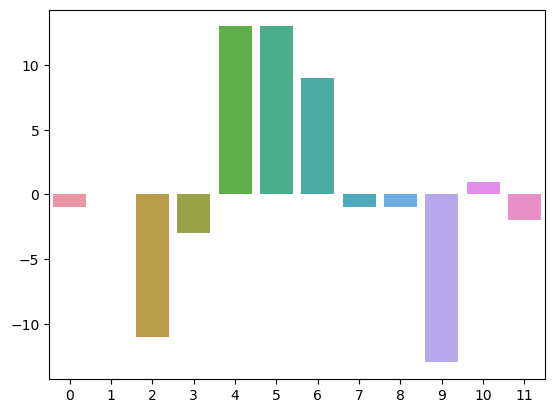

In [5]:
def subtract(a,b):
    return a-b

temps = [70, 69, 69, 58, 55, 68, 81, 90, 89, 88, 75, 76, 74]



diffs = list(it.starmap(subtract, zip(temps[1:], temps[:-1])))

data = {"x": list(range(len(diffs))), "y": diffs}
sns.barplot(data=data, x="x", y="y")

# <a id='toc7_'></a>[`itertools` use scenario #2: Zip functions](#toc0_)

Aggregate elements from each iterable. Have the option to introduce a fill value.

_Scenario_: You want the output of a `zip` to still contain the same number of elements as the longest iterable..

## <a id='toc7_1_'></a>[`itertools.zip_longest()`](#toc0_)

In [6]:
# Start with a case where the number of elements is matched.
driver_first_names = ['Lewis (GOAT)','George','Charles','Max']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(zip(driver_first_names, driver_last_names,team_names))

[('Lewis (GOAT)', 'Hamilton', 'Mercedes'),
 ('George', 'Russell', 'Mercedes'),
 ('Charles', 'Leclerc', 'Ferrari'),
 ('Max', 'Verstappen', 'Red Bull (Boo)')]

In [7]:
# Poor Latifi is still in the list.

driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(it.zip_longest(driver_first_names, driver_last_names,team_names))

[('Lewis (GOAT)', 'Hamilton', 'Mercedes'),
 ('George', 'Russell', 'Mercedes'),
 ('Charles', 'Leclerc', 'Ferrari'),
 ('Max', 'Verstappen', 'Red Bull (Boo)'),
 ('Nicholas', 'Latifi', None)]

In [8]:
# Note that the Nicholas Latifi is dropped in the result. Oh wait.

driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(zip(driver_first_names, driver_last_names,team_names))

[('Lewis (GOAT)', 'Hamilton', 'Mercedes'),
 ('George', 'Russell', 'Mercedes'),
 ('Charles', 'Leclerc', 'Ferrari'),
 ('Max', 'Verstappen', 'Red Bull (Boo)')]

## <a id='toc7_2_'></a>[`more_itertools.zip_offset()`](#toc0_)

_Scenario_: You want to offset the zip operations.

In [9]:
driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(more_it.zip_offset(driver_first_names,driver_last_names,team_names, offsets=(0,0,0),longest=True,fillvalue=None))

[('Lewis (GOAT)', 'Hamilton', 'Mercedes'),
 ('George', 'Russell', 'Mercedes'),
 ('Charles', 'Leclerc', 'Ferrari'),
 ('Max', 'Verstappen', 'Red Bull (Boo)'),
 ('Nicholas', 'Latifi', None)]

In [10]:
driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(more_it.zip_offset(driver_first_names,driver_last_names,team_names, offsets=(1,0,0),longest=True,fillvalue='Seriously?'))

[('George', 'Hamilton', 'Mercedes'),
 ('Charles', 'Russell', 'Mercedes'),
 ('Max', 'Leclerc', 'Ferrari'),
 ('Nicholas', 'Verstappen', 'Red Bull (Boo)'),
 ('Seriously?', 'Latifi', 'Seriously?')]

In [11]:
# With team offset, Nicholas Latifi went to Red Bull. And Charles goes to Mercedes. Oh my!

driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(more_it.zip_offset(driver_first_names,driver_last_names,team_names, offsets=(0,0,-1),longest=True))

[('Lewis (GOAT)', 'Hamilton', None),
 ('George', 'Russell', 'Mercedes'),
 ('Charles', 'Leclerc', 'Mercedes'),
 ('Max', 'Verstappen', 'Ferrari'),
 ('Nicholas', 'Latifi', 'Red Bull (Boo)')]

In [12]:
# With longest=False, Latifi has disappeared.

driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(more_it.zip_offset(driver_first_names,driver_last_names,team_names, offsets=(1,0,0),longest=False))

[('George', 'Hamilton', 'Mercedes'),
 ('Charles', 'Russell', 'Mercedes'),
 ('Max', 'Leclerc', 'Ferrari'),
 ('Nicholas', 'Verstappen', 'Red Bull (Boo)')]

In [13]:
driver_first_names = ['Lewis (GOAT)','George','Charles','Max','Nicholas']
driver_last_names = ['Hamilton','Russell','Leclerc','Verstappen','Latifi']
team_names = ['Mercedes', 'Mercedes','Ferrari','Red Bull (Boo)']

list(more_it.zip_offset(driver_first_names,driver_last_names,team_names, offsets=(0,1,0),longest=True))

[('Lewis (GOAT)', 'Russell', 'Mercedes'),
 ('George', 'Leclerc', 'Mercedes'),
 ('Charles', 'Verstappen', 'Ferrari'),
 ('Max', 'Latifi', 'Red Bull (Boo)'),
 ('Nicholas', None, None)]

# <a id='toc8_'></a>[`itertools` use scenario #3: Recursive functions](#toc0_)

Original source: [Real Python](https://realpython.com/python-itertools/) 

Wiki on Recurrence relations: [Wiki](https://en.wikipedia.org/wiki/Recurrence_relation)

Recurrence relations in math: [LibText Math](https://math.libretexts.org/Bookshelves/Combinatorics_and_Discrete_Mathematics/Applied_Discrete_Structures_(Doerr_and_Levasseur)/08%3A_Recursion_and_Recurrence_Relations/8.03%3A_Recurrence_Relations)

**Recurrence relation**: An equation that can be used to predict the _n_th term of a sequence based on a combination of a previous set of terms.

## <a id='toc8_1_'></a>[First order recurrence relations](#toc0_)

Only the previous term is needed to calculate the next term. The choice of $P$ and $Q$ terms can cover first order recurrence relations.

$$
  s_n = Ps_{n-1} + Q
$$

```python
    def first_order(p, q, initial_val):
        """Return sequence defined by s(n) = p * s(n-1) + q."""
        return it.accumulate(it.repeat(initial_val), lambda s, _: p*s + q)
```


**Examples**

```python
    evens = first_order(p=1, q=2, initial_val=0)
    >>>> list(next(evens) for _ in range(5))
    [0, 2, 4, 6, 8]

    alternating_ones = first_order(p=-1, 0, initial_val=1)
    >>> list(next(alternating_ones) for _ in range(5))
    [1, -1, 1, -1, 1]


```

## <a id='toc8_2_'></a>[Second order recurrence relations](#toc0_)

Two previous terms are needed to calculate the next term

$$
  s_n = Ps_{n-1} + Qs_{n-2} + R
$$

```python
  def second_order(p, q, r, initial_values):
      """Return sequence defined by s(n) = p * s(n-1) + q * s(n-2) + r."""
      intermediate = it.accumulate(
          it.repeat(initial_values),
          lambda s, _: (s[1], p*s[1] + q*s[0] + r)
      )
      return map(lambda x: x[0], intermediate)
```

**Examples**

```python
  # Fibonacci sequence
  fibs = second_order(p=1, q=1, r=0, initial_values=(0, 1))
  >>> list(next(fibs) for _ in range(8))
  [0, 1, 1, 2, 3, 5, 8, 13]
```

**We will revisit recurrence relations in exercises!**

# <a id='toc9_'></a>[`itertools` use scenario #4: Combining Data](#toc0_)

## <a id='toc9_1_'></a>[`more_itertools.collapse()`](#toc0_)

Flattens all levels of nesting.

`more_itertools.flatten()`: Will automatically flatten to only one .

**Note**: You can specify levels of flattening.

In [14]:
multi_level_nesting = [(1, 2), ([3, 4], [[5], [6]])]
list(more_it.collapse(multi_level_nesting))

[1, 2, 3, 4, 5, 6]

In [15]:
multi_level_nesting = [(1, 2), ([3, 4], [[5], [6]])]
list(more_it.flatten(multi_level_nesting))

[1, 2, [3, 4], [[5], [6]]]

In [16]:
multi_level_nesting = [(1, 2), ([3, 4], [[5], [6]])]
list(more_it.collapse(multi_level_nesting,levels=1))

[1, 2, [3, 4], [[5], [6]]]

In [17]:
multi_level_nesting = [(1, 2), ([3, 4], [[5], [6]])]
list(more_it.collapse(multi_level_nesting,levels=2))

[1, 2, 3, 4, [5], [6]]

# <a id='toc10_'></a>[`itertools` use scenario #5: Grouping Data](#toc0_)

## <a id='toc10_1_'></a>[`itertools.groupby()`](#toc0_)

Returns consecutive keys and groups from iterable.

Generates a break or a new group every time the value of key function changes. You _may_ want to sort the data first.

```
    [k for k, g in groupby('AAAABBBCCDAABBB')] --> A B C D A B
    [list(g) for k, g in groupby('AAAABBBCCD')] --> AAAA BBB CC D
```

_Scenario_: Find anagrams in list. ([SO post](https://stackoverflow.com/questions/8181513/finding-and-grouping-anagrams-by-python))

In [18]:
# anagram problem

words = ['abc', 'cab', 'cafe', 'goo', 'face']

groups = []
uniquekeys = []
keyfunc = sorted
data = sorted(words, key=keyfunc)
for k, g in it.groupby(data, keyfunc):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)


print("---- The dataset ACTUALLY used in the groupby (Note the changes in the locations of the entries) ----")
pprint.pprint(data)

print("\n----------------------------------------------\n")
print("----- Results from the groupby operation ----")
pprint.pprint(groups)

---- The dataset ACTUALLY used in the groupby (Note the changes in the locations of the entries) ----
['abc', 'cab', 'cafe', 'face', 'goo']

----------------------------------------------

----- Results from the groupby operation ----
[['abc', 'cab'], ['cafe', 'face'], ['goo']]


In [19]:
(sorted(words,key=sorted))

['abc', 'cab', 'cafe', 'face', 'goo']

In [20]:
list(it.groupby(sorted(words,key=sorted),sorted))

[(['a', 'b', 'c'], <itertools._grouper at 0x7ff5033da5e0>),
 (['a', 'c', 'e', 'f'], <itertools._grouper at 0x7ff5033da4c0>),
 (['g', 'o', 'o'], <itertools._grouper at 0x7ff5033da580>)]

_Scenario_: Sort the sequence of words by length.

In [21]:
# Source: https://www.thoughtco.com/longest-german-word-in-the-world-4061494 Please don't ask me to spell these words. Also, I apologize profusely in advance to all German friends.
# Es tut mir sehr leid

super_long_german_word_list = [
    'Rindfleischetikettierungsüberwachungsaufgabenübertragungsgesdog', # Seriously, why did I pick German out of all languages? Modified last letters to dog.
    'Betäubungsmittelverschreibungsverordnung', # regulation requiring a prescription for an anesthetic.
    'Bezirksschornsteinfegermeister', # head district chimney sweep
    'Dlektrizitätendasshauptbetriebswerkbauuntermysaurkrautneedsimproving',
    'Donaudampfschiffahrtselektrizitätenhauptbetriebswerkbauunterbeamtengesellschaft', # association of subordinate officials of the head office management of the Danube steamboat electrical services
    'Donaudampfschifffahrtsgesellschaftskapitän', # Danube steamship company captain
    'Rechtsschutzversicherungsgesellschaften', # legal protection insurance companies
    'Bezirksschornsteinfegermeiscat', # Sorry German friends, I just added cat to the end. I'm poor.
    'Rindfleischetikettierungsüberwachungsaufgabenübertragungsgesetz' # beef labeling regulation and delegation of supervision law
    'siebentausendzweihundertvierundfünfzig', # 7,254 in German - Are you kidding me??
    'BezirksschornsteinfegeMercedes' # I swear, I root for Mercedes Formula 1 team. Sorry Germany!
]

In [22]:
groups = []
uniquekeys = []
# sorting first by length
keyfunc=len
data = sorted(super_long_german_word_list, key=keyfunc)
for k, g in it.groupby(data, keyfunc):
    groups.append(list(g))      # Store group iterator as a list
    uniquekeys.append(k)

print("---- The dataset ACTUALLY used in the groupby ----")
pprint.pprint(data)

print("\n----------------------------------------------\n")
print("----- Results from the groupby operation ----")
pprint.pprint(groups)

---- The dataset ACTUALLY used in the groupby ----
['Bezirksschornsteinfegermeister',
 'Bezirksschornsteinfegermeiscat',
 'BezirksschornsteinfegeMercedes',
 'Rechtsschutzversicherungsgesellschaften',
 'Betäubungsmittelverschreibungsverordnung',
 'Donaudampfschifffahrtsgesellschaftskapitän',
 'Rindfleischetikettierungsüberwachungsaufgabenübertragungsgesdog',
 'Dlektrizitätendasshauptbetriebswerkbauuntermysaurkrautneedsimproving',
 'Donaudampfschiffahrtselektrizitätenhauptbetriebswerkbauunterbeamtengesellschaft',
 'Rindfleischetikettierungsüberwachungsaufgabenübertragungsgesetzsiebentausendzweihundertvierundfünfzig']

----------------------------------------------

----- Results from the groupby operation ----
[['Bezirksschornsteinfegermeister',
  'Bezirksschornsteinfegermeiscat',
  'BezirksschornsteinfegeMercedes'],
 ['Rechtsschutzversicherungsgesellschaften'],
 ['Betäubungsmittelverschreibungsverordnung'],
 ['Donaudampfschifffahrtsgesellschaftskapitän'],
 ['Rindfleischetikettierungsübe

## <a id='toc10_2_'></a>[`more_itertools.grouper()`](#toc0_)

Group elements from iterable into fixed-length groups of length n.

`more_itertools.chunked`: Doesn't allow to use a fill-in value.


_Scenario_: You want to split records into multiples of _n_.

In [23]:
list(more_it.grouper('ABCDEF', 3))

[('A', 'B', 'C'), ('D', 'E', 'F')]

In [24]:
list(more_it.grouper('ABCDEFG', 3, incomplete='fill', fillvalue='x'))

[('A', 'B', 'C'), ('D', 'E', 'F'), ('G', 'x', 'x')]

In [25]:
# Note how chunked returns only 2 elements in last group.
list(more_it.chunked([1, 2, 3, 4, 5, 6, 7, 8], 3))

[[1, 2, 3], [4, 5, 6], [7, 8]]

In [26]:
# With grouper, you get a fill value.
list(more_it.grouper([1, 2, 3, 4, 5, 6, 7, 8], 3))

[(1, 2, 3), (4, 5, 6), (7, 8, None)]

# <a id='toc11_'></a>[`itertools` use scenario #6: Combinatorics](#toc0_)

## <a id='toc11_1_'></a>[`itertools.permutations()`](#toc0_)

_Scenario_: Well... _permutations_ and _combinations.

In [27]:
list(it.permutations(('Red Bull','Ferrari','Mercedes','Aston Martin'),3))

[('Red Bull', 'Ferrari', 'Mercedes'),
 ('Red Bull', 'Ferrari', 'Aston Martin'),
 ('Red Bull', 'Mercedes', 'Ferrari'),
 ('Red Bull', 'Mercedes', 'Aston Martin'),
 ('Red Bull', 'Aston Martin', 'Ferrari'),
 ('Red Bull', 'Aston Martin', 'Mercedes'),
 ('Ferrari', 'Red Bull', 'Mercedes'),
 ('Ferrari', 'Red Bull', 'Aston Martin'),
 ('Ferrari', 'Mercedes', 'Red Bull'),
 ('Ferrari', 'Mercedes', 'Aston Martin'),
 ('Ferrari', 'Aston Martin', 'Red Bull'),
 ('Ferrari', 'Aston Martin', 'Mercedes'),
 ('Mercedes', 'Red Bull', 'Ferrari'),
 ('Mercedes', 'Red Bull', 'Aston Martin'),
 ('Mercedes', 'Ferrari', 'Red Bull'),
 ('Mercedes', 'Ferrari', 'Aston Martin'),
 ('Mercedes', 'Aston Martin', 'Red Bull'),
 ('Mercedes', 'Aston Martin', 'Ferrari'),
 ('Aston Martin', 'Red Bull', 'Ferrari'),
 ('Aston Martin', 'Red Bull', 'Mercedes'),
 ('Aston Martin', 'Ferrari', 'Red Bull'),
 ('Aston Martin', 'Ferrari', 'Mercedes'),
 ('Aston Martin', 'Mercedes', 'Red Bull'),
 ('Aston Martin', 'Mercedes', 'Ferrari')]

## <a id='toc11_2_'></a>[`itertools.combinations()`](#toc0_)

In [28]:
list(it.combinations(('Red Bull','Ferrari','Mercedes','Aston Martin'),3))

[('Red Bull', 'Ferrari', 'Mercedes'),
 ('Red Bull', 'Ferrari', 'Aston Martin'),
 ('Red Bull', 'Mercedes', 'Aston Martin'),
 ('Ferrari', 'Mercedes', 'Aston Martin')]

## <a id='toc11_3_'></a>[`itertools.product()`](#toc0_)

Cartesian product of input iterables.

Roughly equivalent to nested for-loops in a generator expression. For example, `product(A, B)` returns the same as `((x,y) for x in A for y in B)`.

The nested loops cycle like an odometer with the rightmost element advancing on every iteration. 

In [29]:
list(it.product('ABC','1234',))

[('A', '1'),
 ('A', '2'),
 ('A', '3'),
 ('A', '4'),
 ('B', '1'),
 ('B', '2'),
 ('B', '3'),
 ('B', '4'),
 ('C', '1'),
 ('C', '2'),
 ('C', '3'),
 ('C', '4')]

# <a id='toc12_'></a>[`itertools` use scenario #7: Indexing](#toc0_)

## <a id='toc12_1_'></a>[`more_itertools.locate()`](#toc0_)

_Scenario_: Find Waldo.

In [30]:
waldo_string = ['Where','On','Earth','Is','Waldo','These','Days?','Seriously?','waldo']

print("--- Case 1: Sentence case")

print(list(more_it.locate(waldo_string, lambda x: x == 'Waldo')))


print("\n-------------------------------------------------------\n")

print("--- Case 2: Lower case")

list(more_it.locate(waldo_string, lambda x: x.lower() == 'waldo'))

--- Case 1: Sentence case
[4]

-------------------------------------------------------

--- Case 2: Lower case


[4, 8]

## <a id='toc12_2_'></a>[`itertools.islice()`](#toc0_)

An iterator that returns an nth element.

Note: Does not support negative values for _start_,_stop_,_step_.

In [31]:
prez_list = [
    'FDR','William Hery Harrison','Thomas Jefferson','James Garfield','James Madison','Zachary Taylor','James Monroe','Warren G. Harding'
]

_Scenario_: Separate the longest standing Presidents by term length.

In [32]:
list(it.islice(prez_list,0,None,2))

['FDR', 'Thomas Jefferson', 'James Madison', 'James Monroe']

In [33]:
list(it.islice(prez_list,1,None,2))

['William Hery Harrison',
 'James Garfield',
 'Zachary Taylor',
 'Warren G. Harding']

# <a id='toc13_'></a>[`itertools` use scenario #8: Filtering Data](#toc0_)

## <a id='toc13_1_'></a>[`itertools.compress()`](#toc0_)

Combine an iterable and a boolean selector. Returns corresponding elements where boolean is `True`.

_Scenario_: Using the `mpg` dataset, locate the model name and production year for all cars meeting an efficiency threshold of 40 mpg.

In [34]:
df_mpg = sns.load_dataset('mpg')

df_mpg.head()


,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino


In [35]:
# Implement the threshold criterion
efficiency_threshold = 40
matching_cars = [n > efficiency_threshold for n in df_mpg['mpg']]

# Return the compressed iterator For demonstration, we are zipping multiple iterables
matching_cars_iter = it.compress(list(zip(df_mpg['model_year'], df_mpg['name'])),matching_cars)

# Consume the iterator
print(list(matching_cars_iter))

[(78, 'volkswagen rabbit custom diesel'), (80, 'vw rabbit'), (80, 'mazda glc'), (80, 'datsun 210'), (80, 'vw rabbit c (diesel)'), (80, 'vw dasher (diesel)'), (80, 'honda civic 1500 gl'), (80, 'renault lecar deluxe'), (82, 'vw pickup')]


## <a id='toc13_2_'></a>[`more_itertools.filter_except()`](#toc0_)

Yield the items from iterable for which the validator function does not raise one of the specified exceptions.

validator is called for each item in iterable. It should be a function that accepts one argument and raises an exception if that item is not valid.

_Scenario_: You need to get only the numerical values in a dataset with both numbers and strings, all included in a string form.

In [36]:
data = ['Bah', 'Bah', '28','32.5','Black Sheep', '9', '3.1415', '-1', 'wool']

list(map(float, # This is just to map the output to float
         more_it.filter_except(float, data, TypeError, ValueError)))

[28.0, 32.5, 9.0, 3.1415, -1.0]

_Scenario_: Locate integers in the dataset.

In [37]:
list(map(int, # This is just to map the output to int. 
         more_it.filter_except(int, data, TypeError, ValueError)))

[28, 9, -1]

_Scenario_: Assign `None` to all cases where a number is detected.


**After-discussion fire-side chat:** How can we construct a `validator` that will help us isolate strings?

```python

def filter_except(validator, iterable, *exceptions):
    """Yield the items from *iterable* for which the *validator* function does
    not raise one of the specified *exceptions*.

    *validator* is called for each item in *iterable*.
    It should be a function that accepts one argument and raises an exception
    if that item is not valid.

    >>> iterable = ['1', '2', 'three', '4', None]
    >>> list(filter_except(int, iterable, ValueError, TypeError))
    ['1', '2', '4']

    If an exception other than one given by *exceptions* is raised by
    *validator*, it is raised like normal.
    """
    for item in iterable:
        try:
            validator(item)
        except exceptions:
            pass
        else:
            yield item

```

In [38]:
def is_number(n):
    # SO: https://stackoverflow.com/questions/354038/how-do-i-check-if-a-string-represents-a-number-float-or-int
    try:
        float(n)   # Type-casting the string to `float`.
                   # If string is not a valid `float`, 
                   # it'll raise `ValueError` exception
    except ValueError:
        return False
    return True


list(more_it.map_if(
    data, 
    lambda x: is_number(x), # What to check for the if condition
    lambda x: None # What to do in the exception
    ))


['Bah', 'Bah', None, None, 'Black Sheep', None, None, None, 'wool']

_Scenario_: Locate the indices of the non-numeric numbers

In [39]:
string_indices = list(more_it.locate(data, lambda x: not is_number(x)))

[data[n] for n in string_indices]

['Bah', 'Bah', 'Black Sheep', 'wool']

# <a id='toc14_'></a>[`itertools` scenario #9: Summarizing data](#toc0_)

## <a id='toc14_1_'></a>[`more_itertools.map_reduce()`](#toc0_)


Return a dictionary that maps the items in iterable to categories defined by keyfunc, transforms them with valuefunc, and then summarizes them by category with reducefunc.

### <a id='toc14_1_1_'></a>[The strangeness of `pi`](#toc0_)

How are the digits of pi distributed in the first 1,000,000 decimal places?

Original Sources:
- Stack Overflow [URL](https://stackoverflow.com/questions/9004789/1000-digits-of-pi-in-python)
- Spigots Algorithm [URL](https://www.cs.ox.ac.uk/people/jeremy.gibbons/publications/spigot.pdf)


```python
    DIGITS = 1000

    def pi_digits(x):
        """Generate x digits of Pi."""
        k,a,b,a1,b1 = 2,4,1,12,4
        while x > 0:
            p,q,k = k * k, 2 * k + 1, k + 1
            a,b,a1,b1 = a1, b1, p*a + q*a1, p*b + q*b1
            d,d1 = a/b, a1/b1
            while d == d1 and x > 0:
                yield int(d)
                x -= 1
                a,a1 = 10*(a % b), 10*(a1 % b1)
                d,d1 = a/b, a1/b1

    digits = [str(n) for n in list(pi_digits(DIGITS))]
    print("%s.%s\n" % (digits.pop(0), "".join(digits)))

```

In [40]:
with open("pi_100k.txt","r") as f:
    digits = f.read()


keyfunc = lambda x: x
valuefunc = lambda x: 1
reducefunc = sum
result = more_it.map_reduce(digits, keyfunc, valuefunc, reducefunc)

result

defaultdict(None,
            {'1': 99757,
             '4': 100230,
             '5': 100359,
             '9': 100106,
             '2': 100026,
             '6': 99548,
             '3': 100229,
             '8': 99985,
             '7': 99800,
             '0': 99959})

# <a id='toc15_'></a>[`itertools` scenario #10: Splitting Data](#toc0_)

## <a id='toc15_1_'></a>[`itertools.takewhile()`](#toc0_)

_Scenario_: You have a datastream from a sensor that's streaming numbers. The end of transmission is marked by a letter `e`. 

In [41]:
list(it.takewhile(lambda x: x.isdigit(),'123456e'))

['1', '2', '3', '4', '5', '6']

In [42]:
list(more_it.locate(it.takewhile(lambda x: x.isdigit(),'123456e')))

[0, 1, 2, 3, 4, 5]

### <a id='toc15_1_1_'></a>[Getting the `index` of the entry](#toc0_)

_Scenario_: You need to find the last element that meets a threshold value.

In [43]:
sum(1 for _ in it.takewhile(lambda x: x.isdigit(),'123456e'))

6

In [44]:
list(more_it.locate(it.takewhile(lambda x: x.isdigit(),'123456e')))

[0, 1, 2, 3, 4, 5]

## <a id='toc15_2_'></a>[`more_itertools.map_except()`](#toc0_)

_Scenario_: You have an instrument that tags a letter `s` to indicate a start, and a letter `e` to indicate the end of a transmission.

We can _combine_ multiple libraries!

In [45]:
transmission_string = 's3213127846921834289123e'

list(it.compress(transmission_string, more_it.map_except(lambda x: x.isdigit(),transmission_string)))

['3',
 '2',
 '1',
 '3',
 '1',
 '2',
 '7',
 '8',
 '4',
 '6',
 '9',
 '2',
 '1',
 '8',
 '3',
 '4',
 '2',
 '8',
 '9',
 '1',
 '2',
 '3']

In [46]:
list(more_it.countable(more_it.map_except(lambda x: x.isdigit(),transmission_string)))

[False,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 True,
 False]

In [47]:
list(more_it.locate(more_it.map_except(lambda x: x.isdigit(),transmission_string)))

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

In [48]:
list(
    more_it.map_except(
        lambda x: x[1] if x[0].isdigit() else -1,
        zip(transmission_string,range(len(transmission_string)))
    )
)

[-1,
 1,
 2,
 3,
 4,
 5,
 6,
 7,
 8,
 9,
 10,
 11,
 12,
 13,
 14,
 15,
 16,
 17,
 18,
 19,
 20,
 21,
 22,
 -1]

In [49]:
list(
    it.filterfalse(
        lambda x: x < 0,
        more_it.map_except(
            lambda x: x[1] if x[0].isdigit() else -1,
            zip(transmission_string,range(len(transmission_string)))
        ),
    )
)

[1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22]

## <a id='toc15_3_'></a>[`moreitertools.partition()`](#toc0_)

_Scenario_: You have an instrument that is generating multiple cycles worth of information. The data is written to a text file. 
You need to separate out the cycles for calculations. Each cycle is separated by a string x



In [50]:
lines = '213x3132x312312'

list(more_it.split_at(lines,lambda x: 'x' in x))

[['2', '1', '3'], ['3', '1', '3', '2'], ['3', '1', '2', '3', '1', '2']]